**3장 – 분류**

# 설정

파이썬 3.7 또는 그 이상이 필요합니다:

In [13]:
import sys

assert sys.version_info >= (3, 7)

Scikit-Learn ≥1.0.1이 필요합니다:

In [14]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [15]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [16]:
from pathlib import Path

# MNIST

**sklearn.datasets 패키지의 함수**

*   실전 데이터셋을 다운로드하기 위한 `fetch_*` 함수

*   사이킷런에 번들로 포함된 소규모 데이터셋을 로드하기 위한 `load_*` 함수

*   테스트에 유용한 가짜 데이터셋을 생성하기 위한 `make_*` 함수





## 데이터 로드

In [24]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [25]:
# 데이터셋의 설명을 확인하려면 DESCR 어트리뷰트를 확인
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

**데이터 출처**
*   NIST의 SD-3(센서스국 직원 수집) 및 SD-1(고등학생 수집)에서 파생
*   SD-3은 SD-1보다 훨씬 깨끗하고 인식하기 쉬움
*   SD-1 데이터는 작가별로 뒤섞여 있으며, 작가 신원 정보를 사용해 정리

**데이터셋 재구성**
*   SD-1을 두 부분으로 나누어 새로운 훈련 세트와 테스트 세트 구성
*   새 훈련 세트: SD-3의 패턴과 SD-1의 첫 250명의 패턴 포함
*   새 테스트 세트: SD-3의 패턴과 SD-1의 나머지 250명의 패턴 포함
*   전체 60,000개 샘플 훈련 세트 및 10,000개 샘플 테스트 세트 제공

**활용 가치**
*   실세계 데이터에 대한 학습 기술 및 패턴 인식 방법 시도에 이상적
*   전처리 및 포맷팅에 최소한의 노력으로 접근 가능


In [26]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [27]:
X, y = mnist.data, mnist.target
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [28]:
y.shape

(70000,)

In [29]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [30]:
X.shape

(70000, 784)

In [31]:
28 * 28 # 784는 28 * 28 임

784

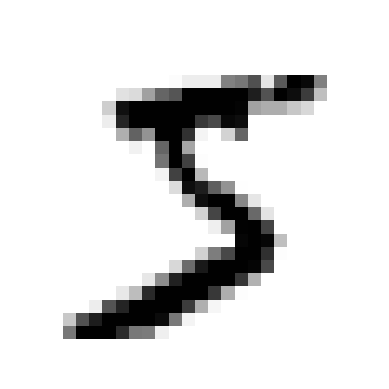

In [32]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [33]:
y[0]

'5'

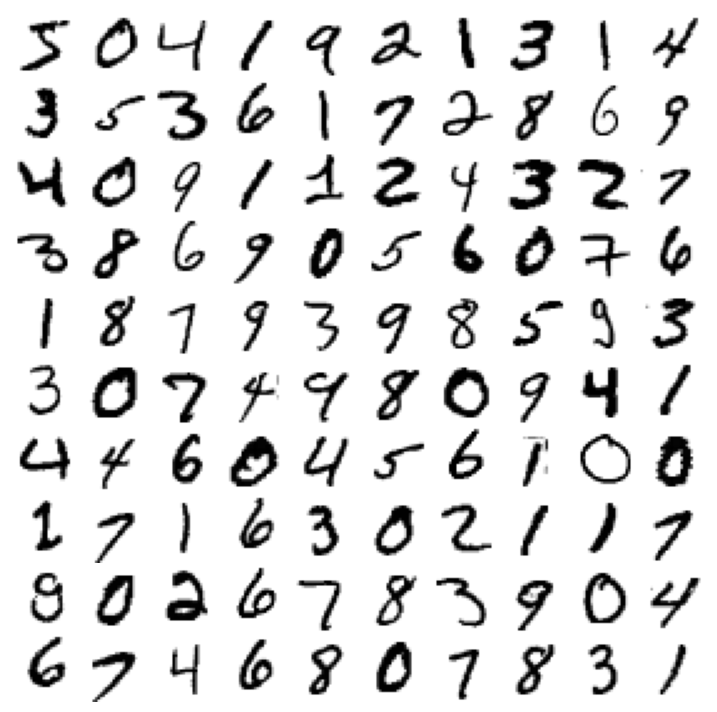

In [34]:
# plt에 서브플롯을 10*10개를 출력함. 전체 크기는 9인치*9인치
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1) #subplot의 인덱스는 1부터 시작
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0) #wspace와 hspace는 패딩값
plt.show()

In [35]:
#6만개 train set, 1만개 test set으로 분리한다.
#일반적으로는 sklearn.model_selection.train_test_split() 함수를 사용하지만
#이번 실습에는 순서를 흐트리지 않고 순차적으로 분리할 것이기에 array를 순차적으로 분리하였다.
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## 이진 분류기 훈련

---

이미지가 5이면 True, 5가 아니면 False로 구분하는 분류기를 만들어 테스트하고자 한다

### 모델 훈련

In [36]:
# 5는 True고, 다른 숫자는 모두 False
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [37]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42) #default는 hinge 즉 SVM
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [38]:
#some_digit은 X[0] 즉 5의 이미지
sgd_clf.predict([some_digit])

array([ True])

In [39]:
sgd_clf.predict([X[1]])

array([False])

### 성능 측정

**교차 검증을 사용한 정확도 측정**


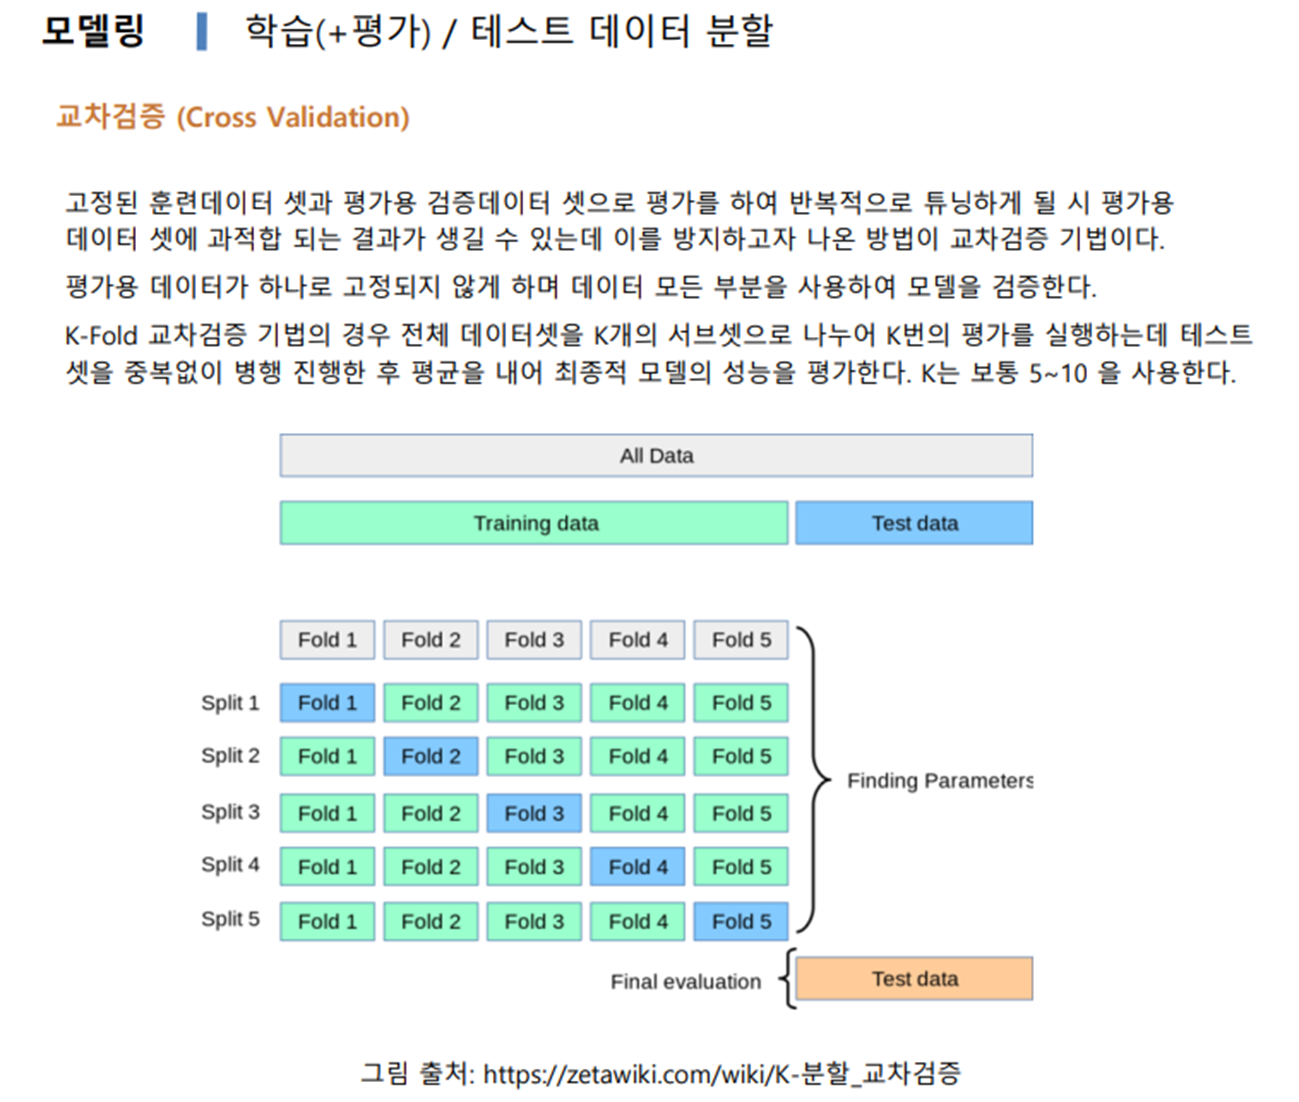

In [40]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [41]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))
# dummy_clf.predict(X_train)
# sum(y_train_5)/len(y_train_5)

False


In [42]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

### 오차 행렬


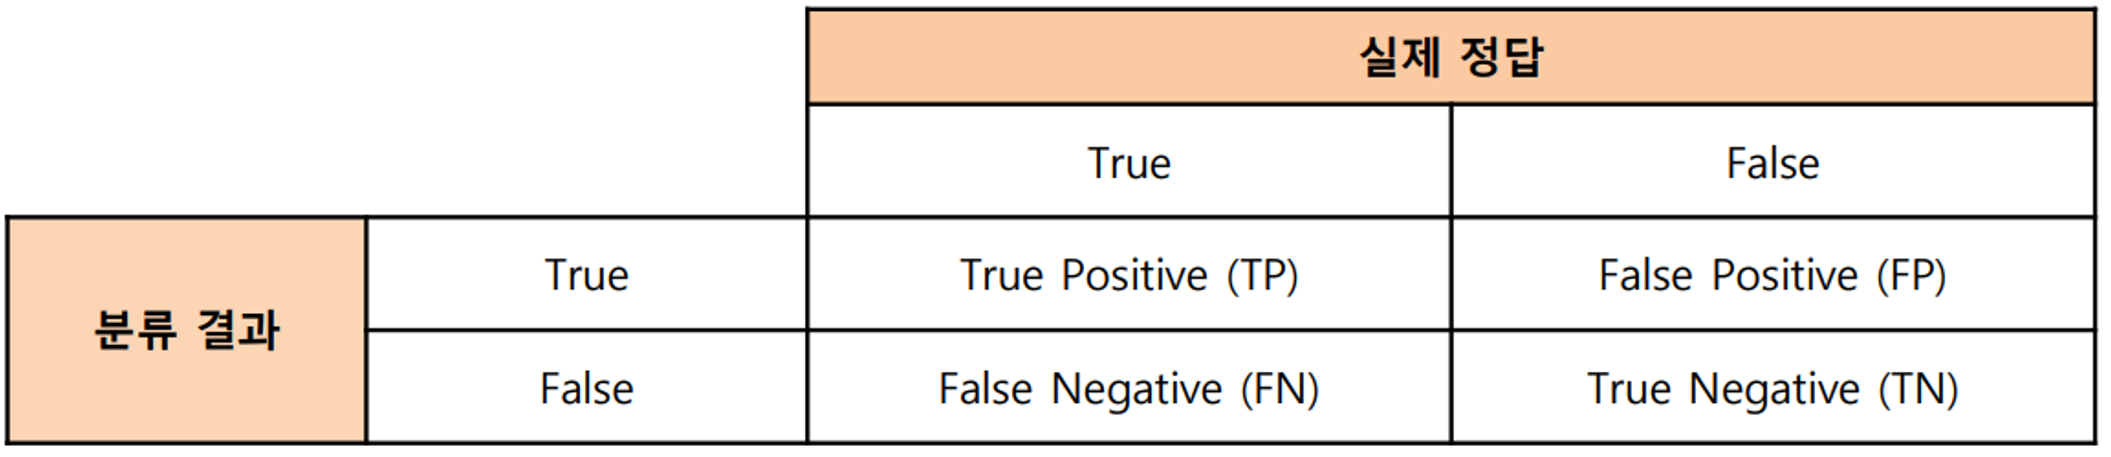



*   **True Positive(TP)** : 실제 True인 정답을 True라고 예측 (정탐)
*   **False Positive(FP)** : 실제 False인 정답을 True라고 예측 (오탐)
*   **False Negative(FN)** : 실제 True인 정답을 False라고 예측 (미탐)
*   **True Negative(TN)** : 실제 False인 정답을 False라고 예측 (정탐)



In [43]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [44]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

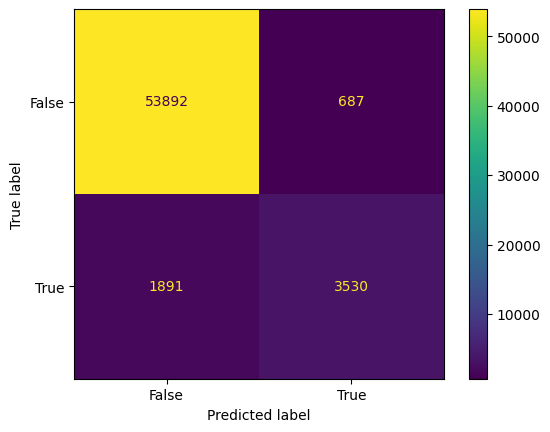

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_train_5, y_train_pred)

[[54579     0]
 [    0  5421]]


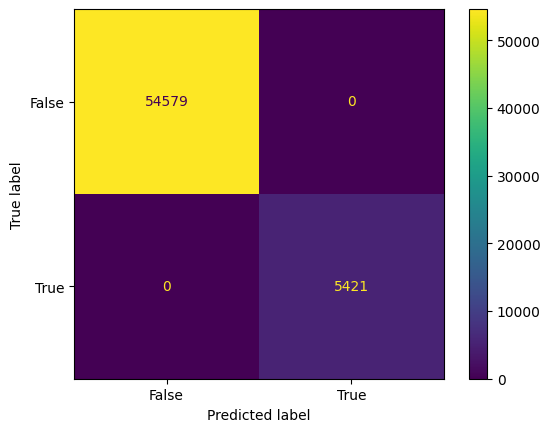

In [46]:
y_train_perfect_predictions = y_train_5  # 완벽한 분류기일 경우
print(confusion_matrix(y_train_5, y_train_perfect_predictions))
ConfusionMatrixDisplay.from_predictions(y_train_5, y_train_perfect_predictions)

### 정밀도와 재현율

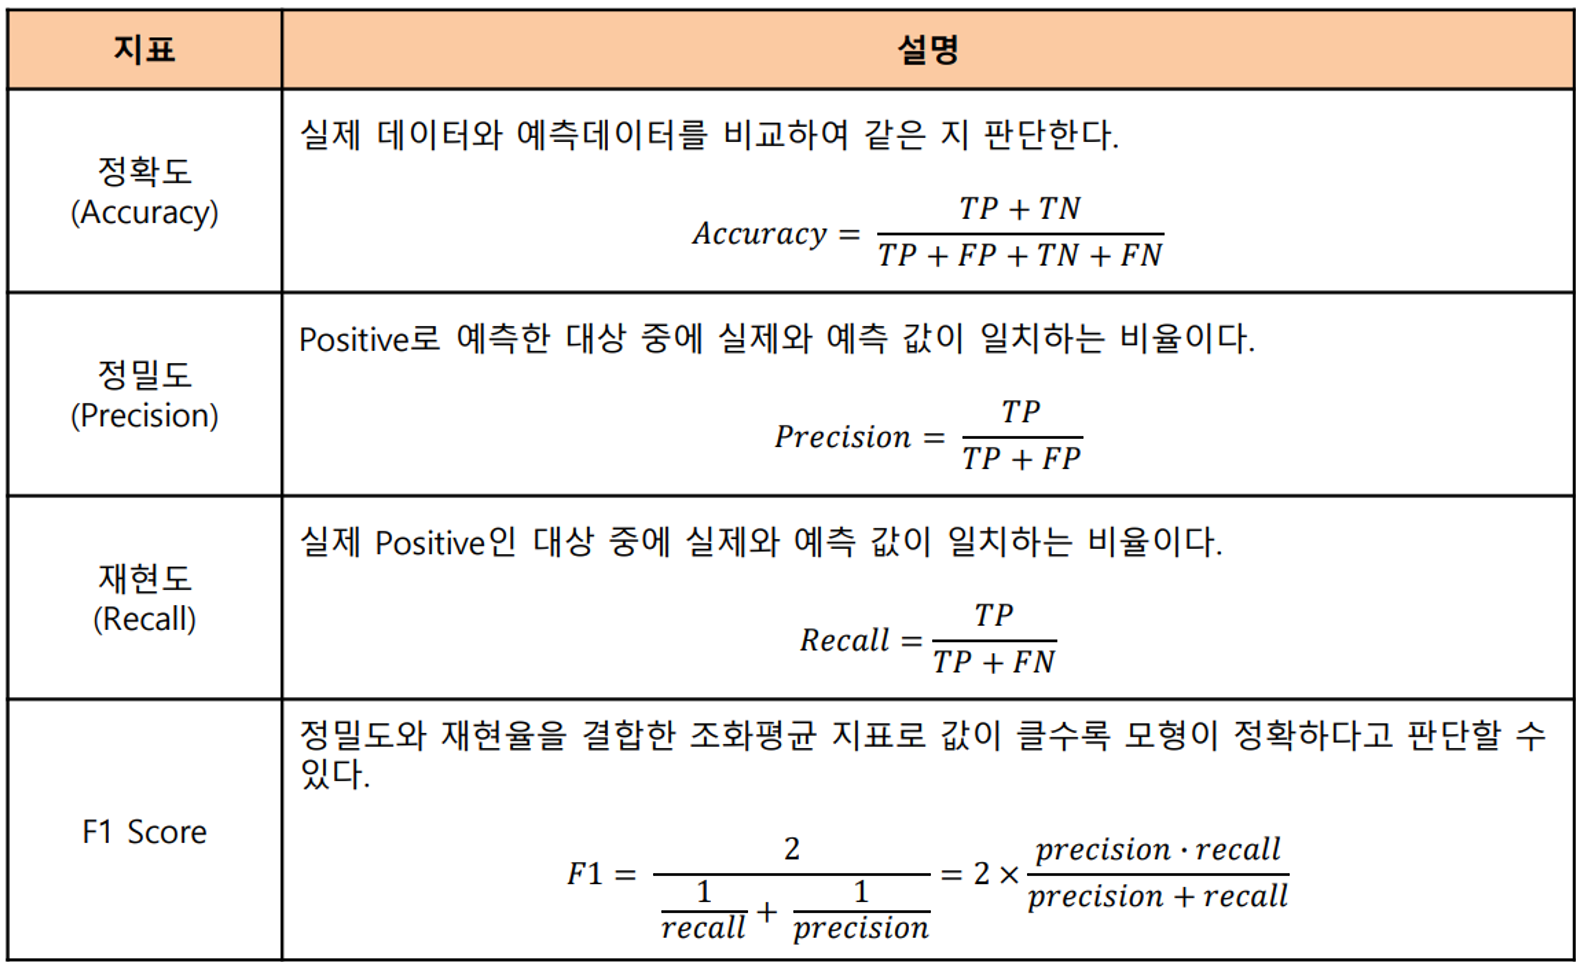

In [47]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)  # == 3530 / (687 + 3530)

0.8370879772350012

In [48]:
# 추가 코드 – TP / (FP + TP) 식으로 정밀도를 계산합니다
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.8370879772350012

In [49]:
recall_score(y_train_5, y_train_pred)  # == 3530 / (1891 + 3530)

0.6511713705958311

In [50]:
# 추가 코드 – TP / (FN + TP) 식으로 정밀도를 계산합니다
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.6511713705958311

In [51]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [52]:
# 추가 코드 – f1 점수를 계산합니다
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

0.7325171197343847

### 정밀도/재현율 트레이드오프

In [53]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [54]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [55]:
y_some_digit_pred

array([ True])

In [56]:
# 추가 코드 – y_scores > 0이면 predict()를 호출하는 것과 같은 결과를 냅니다
y_scores > 0

array([ True])

In [57]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

## 다중 분류기 훈련

### 모델 훈련

SVM은 대용량 데이터셋에 잘 맞지 않기 때문에 처음 2,000개의 샘플만 사용해 훈련, 성능상의 이유

In [69]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])  # y_train_5가 아니고 y_train을 사용합니다.

SVC(random_state=42)

In [70]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [71]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [72]:
class_id = some_digit_scores.argmax()
class_id

5

In [73]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [74]:
svm_clf.classes_[class_id]

'5'

`decision_function()`이 45개 점수를 반환하게 하려면 `decision_function_shape` 매개변수를 `"ovo"`로 지정합니다. 기본값은 `"ovr"`이지만 혼동하지 마세요. `SVC`는 항상 OvO로 훈련합니다. 이 매개변수는 45개 점수를 반환할지 여부에만 영향을 미칩니다:

In [75]:
# 추가 코드 – 45개 OvO 점수를 얻는 방법
svm_clf.decision_function_shape = "ovo"
some_digit_scores_ovo = svm_clf.decision_function([some_digit])
some_digit_scores_ovo.round(2)

array([[ 0.11, -0.21, -0.97,  0.51, -1.01,  0.19,  0.09, -0.31, -0.04,
        -0.45, -1.28,  0.25, -1.01, -0.13, -0.32, -0.9 , -0.36, -0.93,
         0.79, -1.  ,  0.45,  0.24, -0.24,  0.25,  1.54, -0.77,  1.11,
         1.13,  1.04,  1.2 , -1.42, -0.53, -0.45, -0.99, -0.95,  1.21,
         1.  ,  1.  ,  1.08, -0.02, -0.67, -0.14, -0.3 , -0.13,  0.25]])

In [76]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [77]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [78]:
len(ovr_clf.estimators_)

10

SGDClassifier는 선형분류기로서 각 점의 값을 비교하여 분류, 3과 5는 비슷하게 생겨서 오분류하는 문제 발생

In [79]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [80]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

**경고:** 다음 셀은 실행하는데 몇 분이 걸릴 수 있습니다.

### 데이터 정규화

데이터를 정규화하여 학습하면 정확도 향상

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

### 에러 분석

**경고:** 다음 셀은 실행하는데 몇 분이 걸릴 수 있습니다.

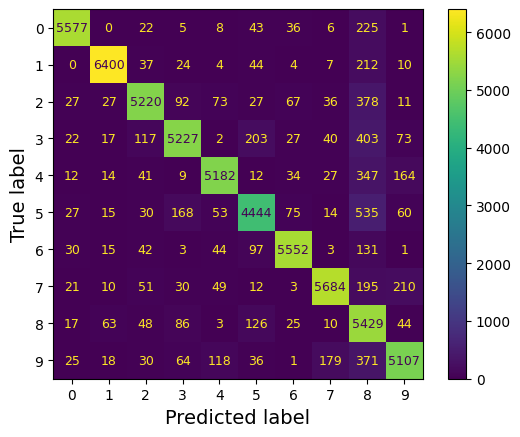

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
plt.rc('font', size=9)  # 추가 코드 - 폰트 크기를 줄입니다
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

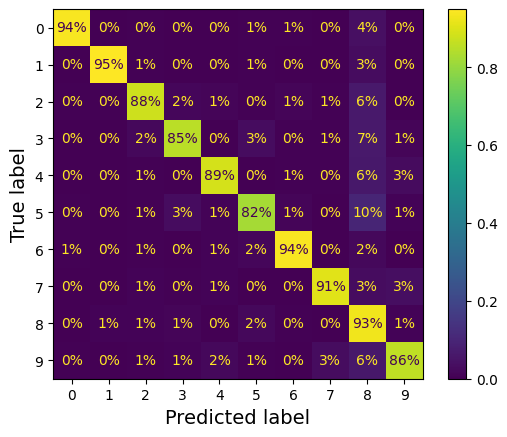

In [ ]:
plt.rc('font', size=10)  # 추가 코드
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize="true", values_format=".0%")
plt.show()

오분류된 샘플들에 대해 True Label 기준으로 분포를 분석

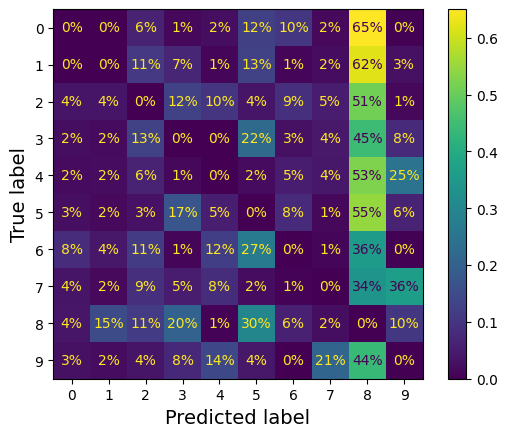

In [ ]:
# y_train이 True Label이므로 이와 같지 않게 분류(오분류)된 데이터를 가지고 분석
sample_weight = (y_train_pred != y_train)

plt.rc('font', size=10)  # 추가 코드
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
plt.show()

*  혼돈행렬을 행 기반 정규화
*  행단위로 100%가 되도록 하면 각 True값이 어느 클래스로 오분류 되고 있는지 현황파악이 쉬움

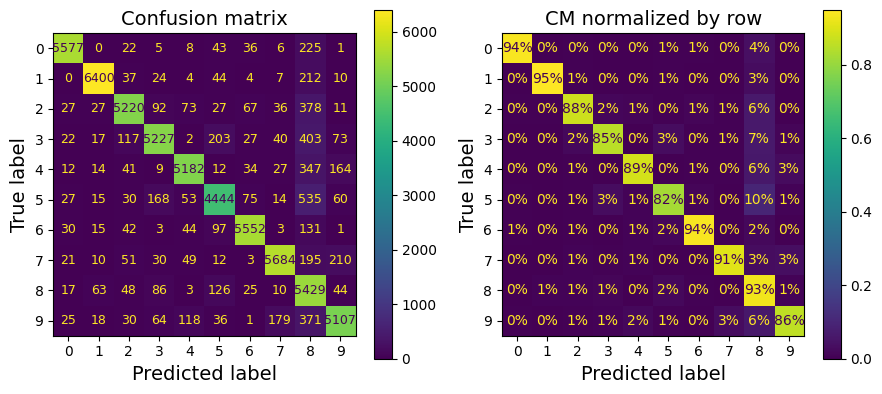

In [ ]:
# 추가 코드 – 그림 3–9을 생성하고 저장합니다
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0])
axs[0].set_title("Confusion matrix")
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")
save_fig("confusion_matrix_plot_1")
plt.show()

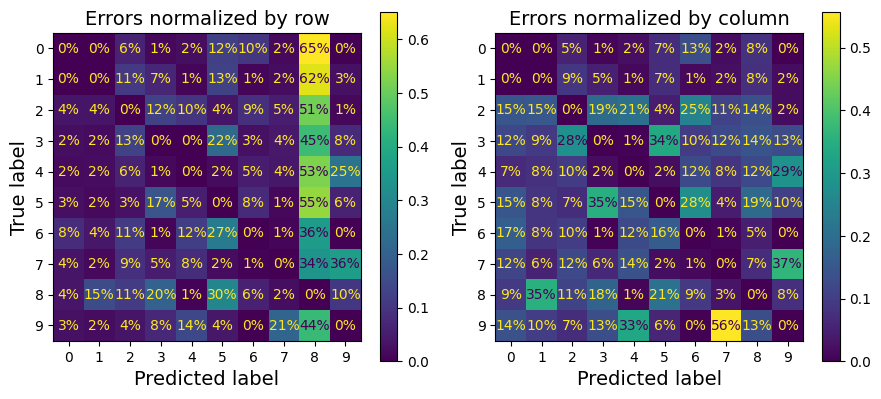

In [ ]:
#혼돈행렬의  행기반 정규화와 컬럼기반 정규화
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0],
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        sample_weight=sample_weight,
                                        normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")
save_fig("confusion_matrix_plot_2")
plt.show()
plt.rc('font', size=14)  # 폰트 크기를 다시 키웁니다

* 3과 5는 글자 모양이 비슷하여 쉽게 오분류 됨
*  어느정도 오분류 하고 있는지 네가지 종류로 확인함

In [ ]:
cl_a, cl_b = '3', '5'
#3을 3으로 분류한 이미지 리스트
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
#3을 5로 분류한 이미지 리스트
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
#5를 3으로 분류한 이미지 리스트
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
#5를 5로 분류한 이미지 리스트
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

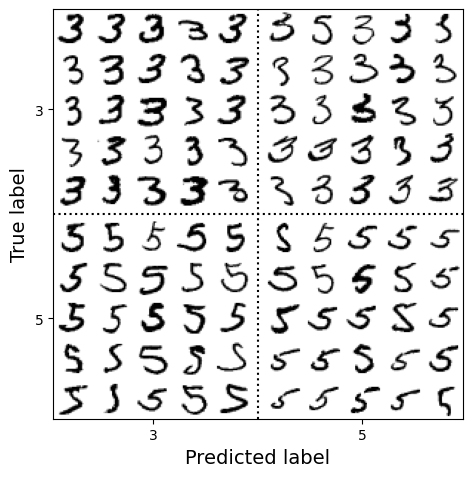

In [ ]:
# 네가지 이미지리스트를 혼돈행렬 배치로 이미지를 표시
size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()